<a href="https://colab.research.google.com/github/ivanhue/genetic-algorithm/blob/main/Genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos genéticos**

## Import y variables

In [ ]:
#!pip install deap
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.animation import FuncAnimation
import random as r
from pandas import *

CADENA = 24
b = 10
a = 0

## **Función de aptitud (fitness)**
### $ f(x,y) = \sum_{i=1}^{5} c_i exp[-\frac{1}{\pi}(x-a_i)^2-\frac{1}{\pi}(y-b_i)^2]cos(\pi(x-a_i)^2+\pi(y-b_i)^2) $
$ 0 \leq x,y \leq 10 $

donde $ a = [3,5,2,1,7],\ b = [5,2,1,4,9],\ c = [1,2,5,2,3]$

In [ ]:
# Función de aptitud inversa
def f(x,y):
  a = np.array([3,5,2,1,7])
  b = np.array([5,2,1,4,9])
  c = np.array([1,2,5,2,3])

  res = 0
  for i in range(5):
    res = res - (c[i]*math.exp(-(1/math.pi)*np.power((x-a[i]),2) - ((1/math.pi)*(np.power((y-b[i]),2))))) * (math.cos(math.pi*(np.power((x-a[i]),2)) + (math.pi*(np.power((y-b[i]),2)))))
  return res

In [ ]:
# Función de aptitud objetivo
def g(x,y):
  a = np.array([3,5,2,1,7])
  b = np.array([5,2,1,4,9])
  c = np.array([1,2,5,2,3])

  res = 0
  for i in range(5):
    res = res + (c[i]*math.exp(-(1/math.pi)*np.power((x-a[i]),2) - ((1/math.pi)*(np.power((y-b[i]),2))))) * (math.cos(math.pi*(np.power((x-a[i]),2)) + (math.pi*(np.power((y-b[i]),2)))))
  return res

## Población

In [ ]:
# Genera un individuo con los valores de cromosoma aleatorios
def crear_individuo():
  cromosoma = []
  for _ in range(2*CADENA):
    cromosoma.append(r.randint(0,1))
  return cromosoma

In [ ]:
def poblacion_inicial(N):
  poblacion = []
  for _ in range(N):
    poblacion.append(crear_individuo())
  return poblacion

In [ ]:
# A partir de un cromosoma devuelve, en binario, sus dos partes X, Y
def get_sublists(cromosoma):
    x = []
    y = []
    cont=0
    for i in cromosoma:
      if cont<((len(cromosoma)/2)):
        x.append(i)
      else:
        y.append(i)
      cont=cont+1
    return x,y

In [ ]:
def binario_a_decimal(cromosoma, b, a, m):
  decimal1 = 0
  decimal2 = 0
  x,y=get_sublists(cromosoma)
  for digit in x:
    decimal1 = decimal1*2 + int(digit)
  for digit in y:
    decimal2 = decimal2*2 + int(digit)

  decimal1 = a + decimal1 * (b-a)/((2**m)-1)
  decimal2 = a + decimal2 * (b-a)/((2**m)-1)

  return decimal1, decimal2

In [ ]:
def decimal_a_binario(x,y, b, a, m):
  cromosoma = []

  # Calcular el valor de X
  num = ((x-a)*(2**m-1))/(b-a)
  num = (int)(num)

  binario = [int(i) for i in bin(num)[2:]]
  if len(binario)<24:
    for i in range(24-len(binario)):
      binario.insert(i,0)
  cromosoma = [i for i in binario]

  # Calcular el valor de Y
  num = ((y-a)*(2**m-1))/(b-a)
  num = (int)(num)
  binario = [int(i) for i in bin(num)[2:]]
  if len(binario)<24:
    for i in range(24-len(binario)):
      binario.insert(i,0)

  # Al final se unen las partes en el cromosoma
  cromosoma = cromosoma + binario
  return cromosoma

In [ ]:
def evaluar(poblacion):
  valores = []
  for individuo in poblacion:
    x,y = binario_a_decimal(individuo,b,a,CADENA)
    valores.append(f(x,y))
  return valores


In [ ]:
def evaluar_verdadera(poblacion):
  valores = []
  for individuo in poblacion:
    x,y = binario_a_decimal(individuo,b,a,CADENA)
    valores.append(g(x,y))
  return valores

In [ ]:
def evaluar_individuo(cromosoma):
  valor = 0
  x,y = binario_a_decimal(cromosoma,b,a,CADENA)
  valor = f(x,y)
  return valor

In [ ]:
def elegidos(poblacion, num_elegidos):
  valores = []
  valores = evaluar(poblacion)
  for i in range(len(poblacion)):
      for j in range(i + 1, len(valores)):
        if valores[i] < valores[j]:
          valores[i], valores[j] = valores[j], valores[i]
          poblacion[i], poblacion[j] = poblacion[j], poblacion[i]

  return [poblacion[i] for i in range(0,num_elegidos)]


## Selección

## Ruleta

In [ ]:
def ordenar_ruleta(poblacion,n):
  nueva_poblacion = []
  probabilidad = []
  valores = []
  valores = evaluar(poblacion)
  # Calculando total
  valores = [i for i in valores if i >=0]
  total = 0
  for i in valores:
    total = total + i
  if len(valores)>n:
    # Calculando probabilidad
    for i in valores:
      probabilidad.append(i/total)
      nueva_poblacion.append(i)
    print(probabilidad)
    for i in range(len(probabilidad)):
      for j in range(i + 1, len(probabilidad)):
        if probabilidad[i] < probabilidad[j]:
          probabilidad[i], probabilidad[j] = probabilidad[j], probabilidad[i]
          poblacion[i], poblacion[j] = poblacion[j], poblacion[i]

    # Acumulando probabilidades
    for i in range(len(probabilidad)):
      if i > 0:
        probabilidad[i] = probabilidad[i]+probabilidad[i-1]
    print(probabilidad)
  return probabilidad, poblacion

In [ ]:
def elegir(probabilidad, eleccion, j):
  i=0
  for i in range(len(probabilidad)):
    if probabilidad[i] > eleccion[j]:
      # Si esto se cumple, ya nos hemos "pasado". Salir de bucle
      break
  return (i)

In [ ]:
def ruleta(poblacion, n):
  probabilidad = []
  indices = []
  poblacion_elegidos = []
  eleccion = []

  probabilidad, poblacion = ordenar_ruleta(poblacion,n)

  if len(probabilidad)>n:
    for _ in range(n):
      eleccion.append(r.random())
    for j in range(n):
      indices.append(elegir(probabilidad, eleccion,j))
    for k in range(len(indices)):
      poblacion_elegidos.append(poblacion[indices[k]])
  else:
    poblacion_elegidos = elegidos(poblacion, n)
  poblacion_elegidos = elegidos(poblacion_elegidos, n)
  return poblacion_elegidos

## Torneo

In [ ]:
def torneo(poblacion, num_participantes, num_toneos):
  nueva_poblacion = []
  evaluacion = []
  for i in range(num_toneos):
    candidatos = []
    for j in range(num_participantes):
      candidatos.append(r.randint(0,len(poblacion)-1))
    for j in range(0,len(candidatos),2):
      if j < (len(candidatos)-1):
        p = []
        p.append(evaluar_individuo(poblacion[candidatos[j]]))
        p.append(evaluar_individuo(poblacion[candidatos[j+1]]))
        if p[0] > p[1]:
          nueva_poblacion.append(poblacion[candidatos[j]])
        else:
          nueva_poblacion.append(poblacion[candidatos[j+1]])

  return nueva_poblacion

## Cruzamiento

In [ ]:
def cruzar(cromosoma1, cromosoma2, punto1, punto2 = None):
  tam = len(cromosoma1)

  # Cruzar en un punto
  if punto2 == None:
    hijo1 = []
    hijo2 = []
    # Hijo 1
    for i in range(0,punto1):
      hijo1.append(cromosoma1[i])
    for i in range(punto1, tam):
      hijo1.append(cromosoma2[i])
    # Hjo 2
    for i in range(0,punto1):
      hijo2.append(cromosoma2[i])
    for i in range(punto1, tam):
      hijo2.append(cromosoma1[i])
    return hijo1, hijo2

  # Cruzar en dos puntos
  else:

    hijo1 = []
    hijo2 = []
    # Hijo 1
    for i in range(0,punto1):
      hijo1.append(cromosoma1[i])
    for i in range(punto1, punto2):
      hijo1.append(cromosoma2[i])
    for i in range(punto2, tam):
      hijo1.append(cromosoma1[i])

    # Hjo 2
    for i in range(0,punto1):
      hijo2.append(cromosoma2[i])
    for i in range(punto1, punto2):
      hijo2.append(cromosoma1[i])
    for i in range(punto2, tam):
      hijo2.append(cromosoma2[i])

    return hijo1, hijo2

In [ ]:
def cruzamiento_un_punto(poblacion, p_cruzamiento,n):
  hijos = []
  h1 = []
  h2 = []
  for i in range(0,len(poblacion)):
    a = 0
    b = 0
    e = r.random()
    if e < p_cruzamiento:
      punto = r.randint(0,n)
      tam = len(poblacion)-1
      while b==a:
        a = r.randint(0,tam)
        b = r.randint(0,tam)

      h1, h2 = cruzar(poblacion[a],poblacion[b],punto)
      hijos.append(h1)
      hijos.append(h2)

  return hijos

# poblacion = poblacion_inicial(5)
# print(DataFrame(cruzamiento_un_punto(poblacion, 0.8, CADENA*2)))


In [ ]:
def cruzamiento_dos_puntos(poblacion, p_cruzamiento, n):
  hijos = []
  h1 = []
  h2 = []
  for i in range(0,len(poblacion)):
    a = 0
    b = 0
    punto1 = 0
    punto2 = 0
    e = r.random()
    if e < p_cruzamiento:
      while punto1 == punto2:
        punto1 = r.randint(0,n)
        while punto1 > punto2:
          punto2 = r.randint(0,n)
      tam = len(poblacion)-1
      while b==a:
        a = r.randint(0,tam)
        b = r.randint(0,tam)

      h1, h2 = cruzar(poblacion[a],poblacion[b],punto1, punto2)
      hijos.append(h1)
      hijos.append(h2)

  return hijos

# poblacion = poblacion_inicial(5)
# print(DataFrame(cruzamiento_dos_puntos(poblacion, 0.8, CADENA*2)))

## Mutación

In [ ]:
def mutacion(poblacion, p_mutacion, n):
  for i in range(len(poblacion)):
    prob = []
    prob = [r.random() for k in range(len(poblacion[0]))]
    for j in range(len(poblacion[i])):
      if prob[j] < p_mutacion:
        poblacion[i][j] = 1 - poblacion[i][j] # Cambia 1 por 0 o 0 por 1

  return poblacion
# print(DataFrame(mutacion(poblacion_inicial(3), 0.1, CADENA*2)))

## Ejecución del algoritmo

In [ ]:
valores_x = []
valores_y = []
valores_f = []
def main():

  # ****** AQUI SE CAMBIAN LAS CONSTANTES ******

  p_mutacion = 0.1
  p_cruzamiento = 0.8
  individuos_circulando = 20
  generaciones = 200
  GENERACIONES = generaciones
  condicion_paro = -0.0000000001
  individuos_necesarios = 15
  # El tipo de seleccion es "torneo", "ruleta"
  tipo_seleccion = "torneo"
  num_participantes_torneo = 10

  # *********************************************

  # Variables necesarias
  seleccion = []
  hijos = []
  evaluar_poblacion = []
  diferencias = 1
  i = 0


  # Valores iniciales
  poblacion = poblacion_inicial(individuos_circulando)
  evaluar_poblacion = evaluar(poblacion)
  seleccion = ruleta(poblacion, individuos_circulando)


  # Inicia el algoritmo genético
  while generaciones>0 and (diferencias <= individuos_necesarios):
    #if generaciones % (GENERACIONES/50) ==0:
    n1,n2 = binario_a_decimal(seleccion[0],b,a,CADENA)
    valores_x.append(n1)
    valores_y.append(n2)
    valores_f.append(evaluar_poblacion[0])


    if tipo_seleccion == "torneo":
      seleccion = torneo(seleccion, num_participantes_torneo, individuos_circulando)
    else:
      seleccion = ruleta(seleccion, individuos_circulando)
    hijos = cruzamiento_dos_puntos(seleccion, p_cruzamiento, CADENA*2)
    for j in hijos:
      seleccion.append(j)
    seleccion = mutacion(seleccion, p_mutacion, CADENA*2)
    if len(seleccion) > individuos_circulando:
      seleccion = elegidos(seleccion,individuos_circulando)
    evaluar_poblacion = evaluar_verdadera(seleccion)
    diferencias = 0
    for j in range(0,len(evaluar_poblacion)-1):
      booleano = (evaluar_poblacion[j]-evaluar_poblacion[j+1]) > condicion_paro
      diferencias = diferencias + (1 if booleano else 0)

    generaciones = generaciones -1

  # Resultados finales
  print("Variables")
  print("Tipo de seleccion:", tipo_seleccion)
  print("Probabilidad de mutación: ",p_mutacion)
  print("Probabilidad de cruzamiento: ", p_cruzamiento)
  print("Condición de paro: ", condicion_paro, "Generaciones:",i )
  print("Generación:", i,"\n", DataFrame(evaluar_poblacion))
  for i in seleccion:
    x,y = binario_a_decimal(i,b,a,CADENA)
    print("x =",x,"y =",y)
main()

Variables
Tipo de seleccion: torneo
Probabilidad de mutación:  0.1
Probabilidad de cruzamiento:  0.8
Condición de paro:  -1e-10 Generaciones: 0
Generación: 0 
            0
0  -4.127544
1  -4.127542
2  -4.127541
3  -4.127536
4  -4.127535
5  -4.127535
6  -4.127534
7  -4.127534
8  -4.127534
9  -4.127526
10 -4.127523
11 -4.127521
12 -4.127509
13 -4.127505
14 -4.127505
15 -4.127493
16 -4.127388
17 -4.127348
18 -4.127346
19 -4.127298
x = 1.992386102222568 y = 1.9889034026207568
x = 1.9924337859412304 y = 1.9888843291332918
x = 1.9924337859412304 y = 1.9887460463491706
x = 1.9924337859412304 y = 1.988598226821317
x = 1.9924337859412304 y = 1.988579153333852
x = 1.9924337859412304 y = 1.9885767691479188
x = 1.9924337859412304 y = 1.9885684244971529
x = 1.992462396172428 y = 1.988598226821317
x = 1.9923682208280695 y = 1.9891924851651481
x = 1.9922239775791155 y = 1.9893373244605854
x = 1.9925863738409504 y = 1.9891924851651481
x = 1.9923956389663005 y = 1.9893379205070687
x = 1.99265313104707

## Gráfica final:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


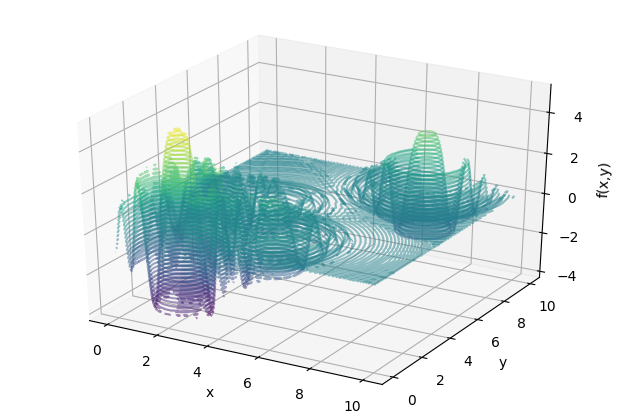

In [ ]:
# Impresión y descarga gif proceso de los mejores de todas las generaciones
x_3 = np.linspace(0, 10, 100)
y_3 = np.linspace(0, 10, 100)
f2_3 = np.vectorize(g)
X_3, Y_3 = np.meshgrid(x_3, y_3)
Z_3= f2_3(X_3, Y_3)

fig_3 = plt.figure(dpi=100)
ax_3 = Axes3D(fig_3)

line = plt.plot(valores_x, valores_y, valores_f, lw=2, c='g')[0]

ax_3.contour3D(X_3, Y_3, Z_3, 50, cmap='viridis', alpha=0.5)
ax_3.set_xlabel('x')
ax_3.set_ylabel('y')
ax_3.set_zlabel('f(x,y)')

# ax_3.view_init(azim=35, elev=-20)

data_set = np.array([valores_x, valores_y, valores_f])
def animation_frame(i, data_set, line):
  line.set_data(data_set[0:2, :i])
  line.set_3d_properties(data_set[2, :i])
  line.set_linewidth(4)
  return line


animacion = FuncAnimation(fig_3, animation_frame, frames=len(valores_f), fargs=(data_set, line), interval=14, blit=False)
animacion.save('AnimationNew2.gif', writer='pillow', fps=60)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


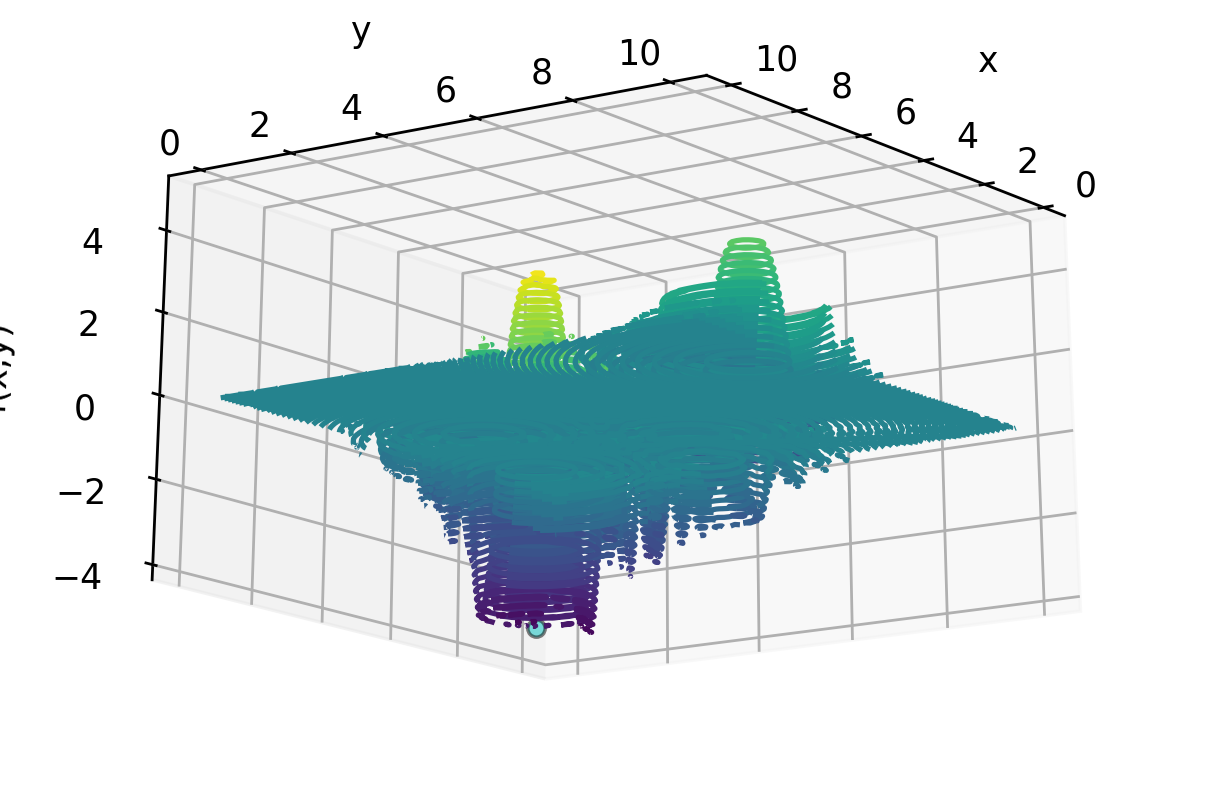

In [ ]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
f2 = np.vectorize(g)
X, Y = np.meshgrid(x, y)
Z = f2(X, Y)

fig = plt.figure(dpi=250)
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')


# El punto mínimo encontrado a lo largo de las corridas realizadas
ax.plot([2.7927966590402518], [1.5979487656324367], [-4.155783], markerfacecolor='c', markeredgecolor='k', marker='.', markersize=10, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# Se puede comentar esta linea para dejar la vista por default
ax.view_init(azim=35, elev=-20)